# UNZIP GIT FOLDER

In [ ]:
!unzip /content/multivariate-weather-data-clustering-main.zip

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import sys
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra

In [5]:
path1 = ('/content/drive/MyDrive/Multivariate Data Independent Study/mock.nc')
path2 = ('/content/drive/MyDrive/Multivariate Data Independent Study/mock_v2.1.nc')
path3 = ('/content/drive/MyDrive/Multivariate Data Independent Study/mock_v3.1.1.nc')
path4 = ('/content/drive/MyDrive/Multivariate Data Independent Study/mock_v4.nc')
path5 = ('/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.csv')
path6 = ('/content/drive/MyDrive/Multivariate Data Independent Study/ERA5_meteo_sfc_2021_hourly.nc')
path6 = ('/content/drive/MyDrive/Multivariate Data Independent Study/rdata_hourly.csv')
path7 = ('/content/drive/MyDrive/Multivariate Data Independent Study/ERA5_meteo_sfc_2021_hourly_smalldomain.nc')
path8 = ('/content/drive/MyDrive/Multivariate Data Independent Study/SST_ONLY_ERA5_meteo_sfc_2021_daily.csv')
#data1 = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
data1 = xr.open_dataset(path1) # To view time in datetime format
data2 = xr.open_dataset(path2)
data3 = xr.open_dataset(path3)
data4 = xr.open_dataset(path4)
data5 = pd.read_csv(path5)
data5=data5.drop(columns=['Unnamed: 0'])
data6 = pd.read_csv(path8)
data6=data6.drop(columns=['Unnamed: 0'])
#datat6 = pd.read_csv(path6)
#data7 = xr.open_dataset(path7)

#Transform Mock Data

In [15]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC'
sys.path.append(path_to_module)
from preprocessing import  transformdmock

In [16]:
mock4= transformdmock(data4)

#K mediods Mock 4

K-medoids clustering is a variant of K-means that is more robust to noises and outliers. Instead of using the mean point as the center of a cluster, K-medoids uses an actual point in the cluster to represent it. Medoid is the most centrally located object of the cluster, with minimum sum of distances to other points

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC/clustering'
sys.path.append(path_to_module)
from clustering.KMediods.kmediods import *

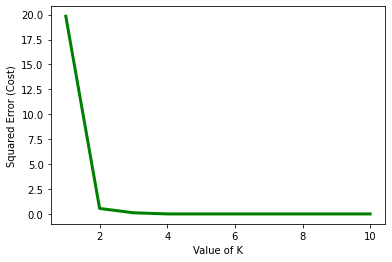

In [19]:
optimalk(mock4)

In [33]:
 frame1,label1= kmedoids(4,mock4)
 silhouette_score(mock4, label1, metric='cosine')

Estimated number of clusters: 4
0    5
3    5
1    5
2    5
Name: Cluster, dtype: int64


0.9999999999999698

In [31]:
from Evaluation.cluster_evaluation import *

In [29]:
print("RMSE | Normalized with Mock")
final2 = RMSE.Evaluation.cluster_evaluation(mock4,label1,frame1,True)
final2

RMSE | Normalized with Mock


NameError: ignored

#Kmediods Real data

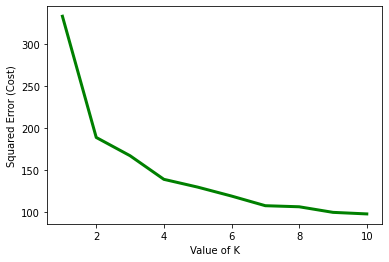

In [32]:
optimalk(data5)

In [38]:
frame2,label2= kmedoids(3,data5)
silhouette_score(data5, label2, metric='cosine')

Estimated number of clusters: 3
0    161
1    113
2     91
Name: Cluster, dtype: int64


0.347547422129336

In [ ]:
print("RMSE | Normalized with Mock")
final2 = RMSE(data5, label2,frame2,True)
final2

RMSE | Normalized with Mock


,0,1,2,3
0,101.13,116.63,100.39,106.86
1,116.63,64.13,118.62,79.64
2,100.39,118.62,81.08,120.29
3,106.86,79.64,120.29,103.65


#Visualization

In [48]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC'
sys.path.append(path_to_module)
from Visualization.make_Csv_cluster import make_Csv_cluster

In [50]:
make_Csv_cluster(label2,'KMDIODS.csv')

In [49]:
path_to_module = '/content/multivariate-weather-data-clustering-main/MWDC'
sys.path.append(path_to_module)
from Visualization.Visualization import visualization

In [52]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
cluster_file='KMDIODS.csv'
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'

total clusters:  3
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6)


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [988.4012627283996, 1035.2741383402094]


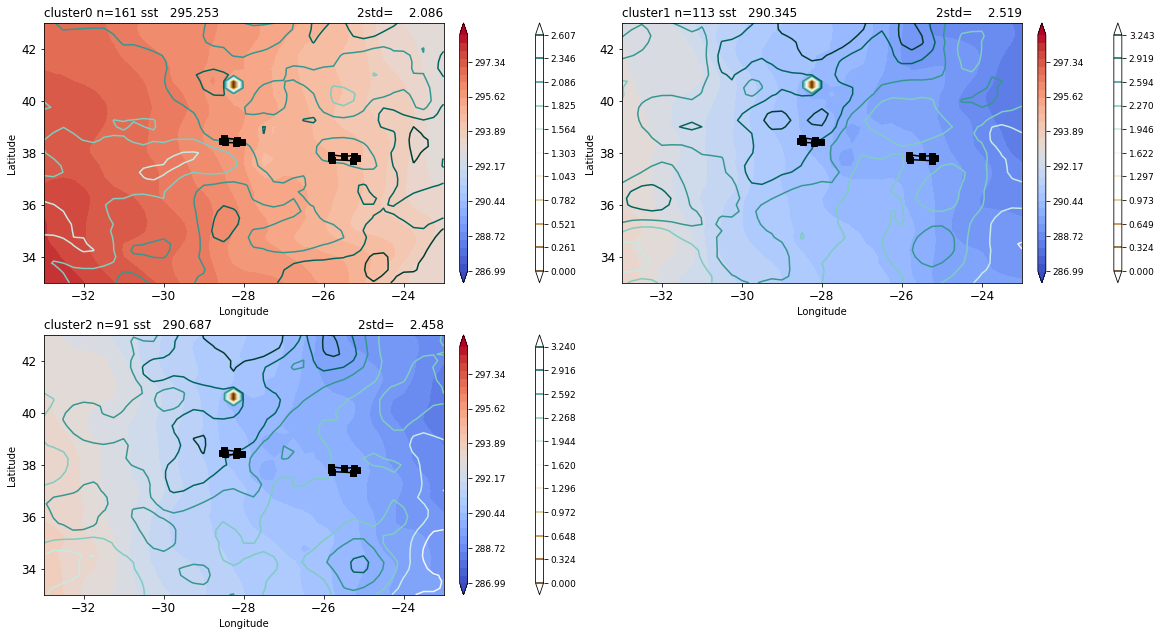

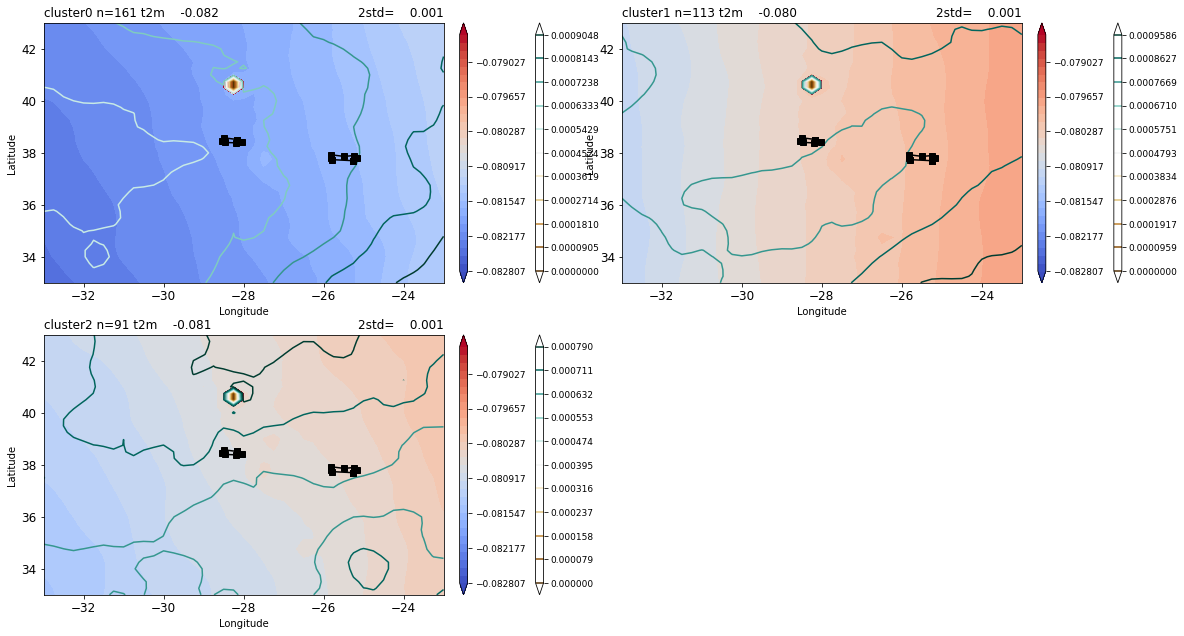

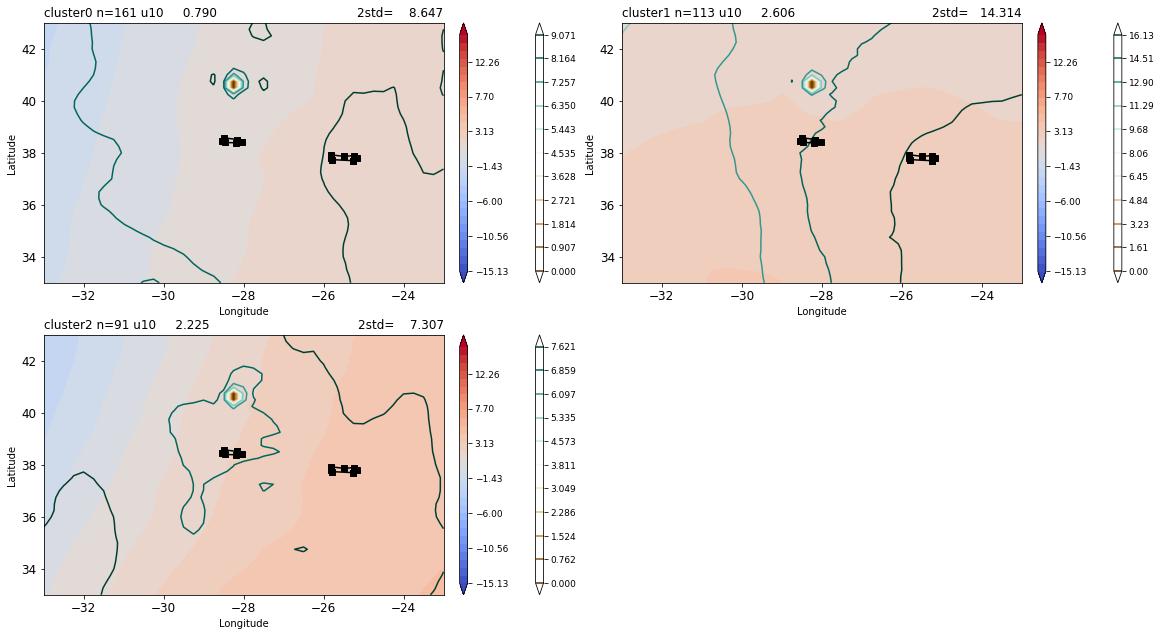

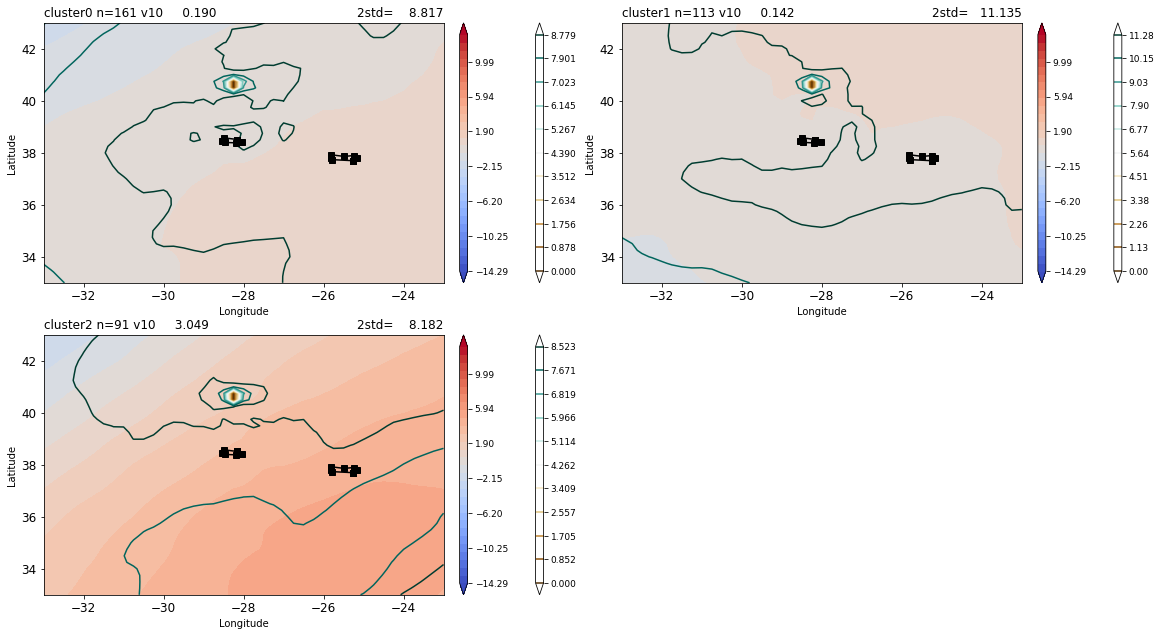

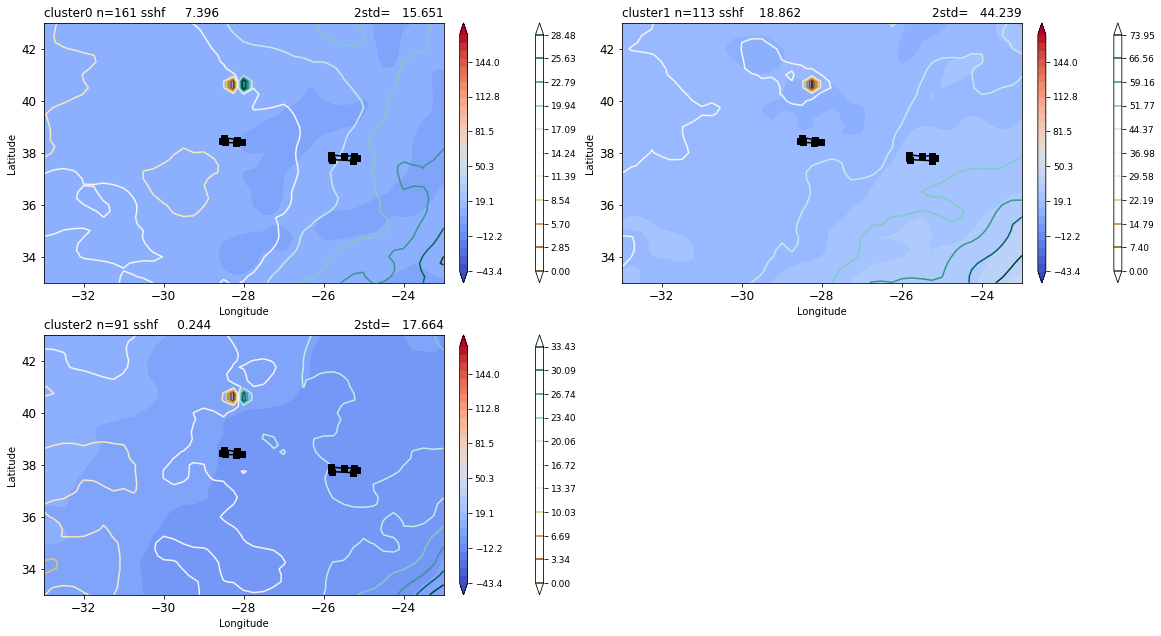

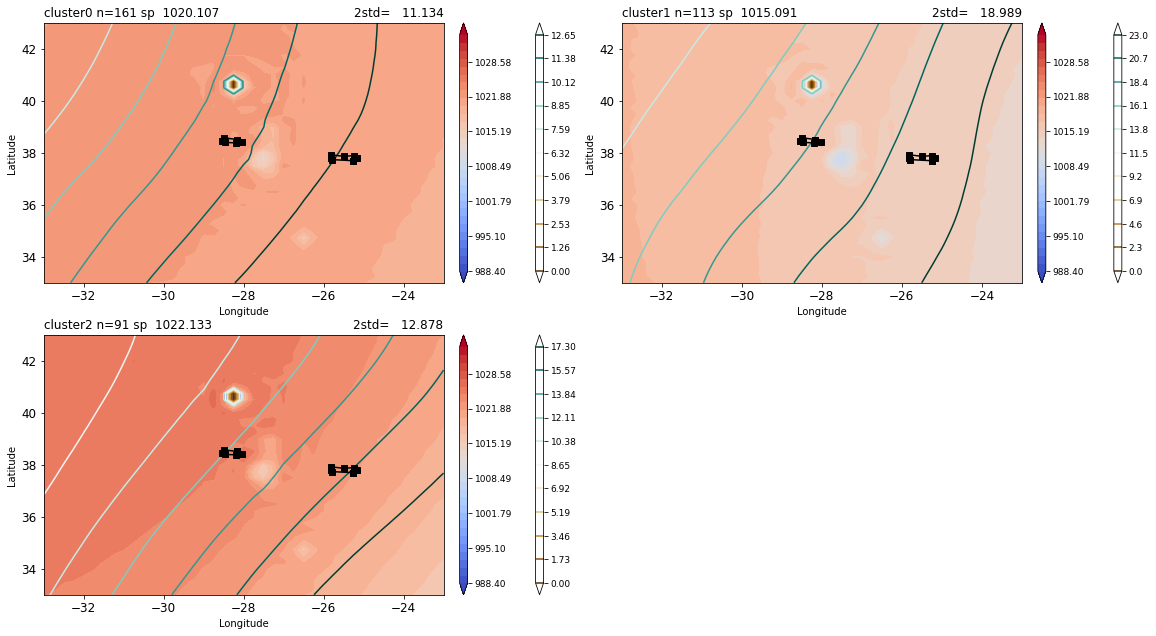

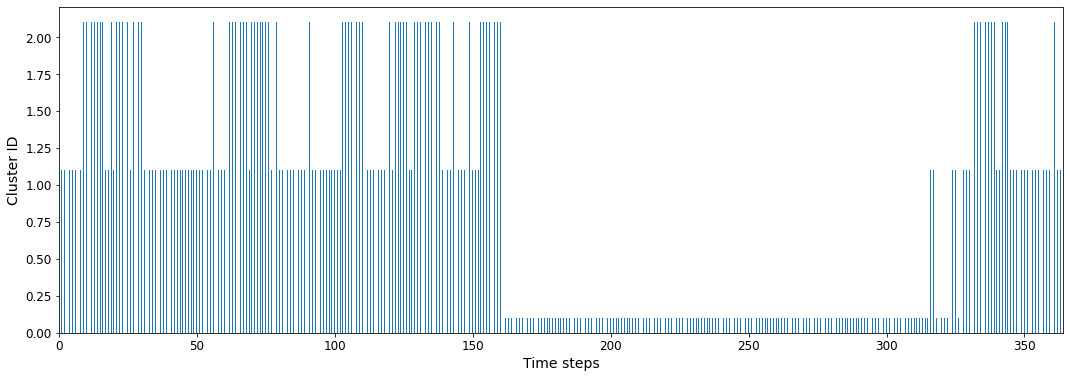

In [53]:
visualization(ncpath,cluster_file,coast_file)

#PCA Realworld

In [55]:
from preprocessing import pca1

In [62]:
frame2,label2= kmedoids(4,pca1(data5,11))
silhouette_score(data5, label2, metric='cosine')

Estimated number of clusters: 4
1    108
0    100
2     86
3     71
Name: Cluster, dtype: int64


0.2663277733007595

In [ ]:
print("RMSE | Normalized with Mock")
final2 = RMSE(pca1(data5,11), label2,frame2,True)
final2

RMSE | Normalized with Mock


,0,1,2,3
0,101.61,114.99,100.56,114.76
1,114.99,99.18,99.47,95.75
2,100.56,99.47,72.54,123.63
3,114.76,95.75,123.63,62.24


In [63]:
make_Csv_cluster(label2,'KMDIODS_PCA.csv')

In [64]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
cluster_file='KMDIODS_PCA.csv'
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'

total clusters:  4
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6)


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [988.4012627283996, 1035.2741383402094]


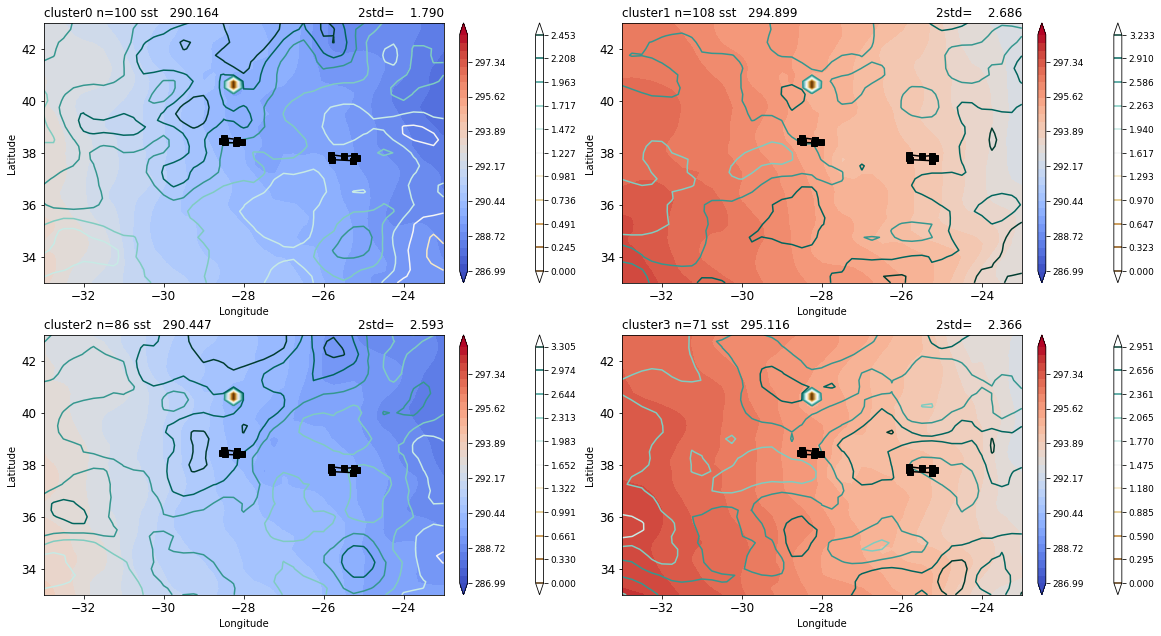

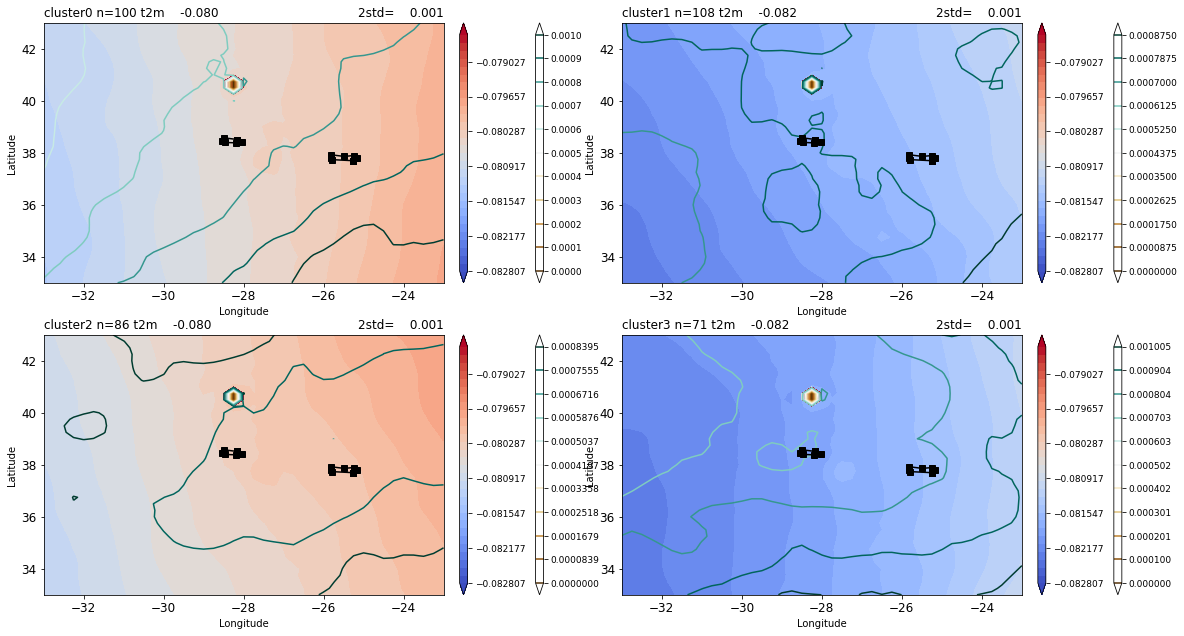

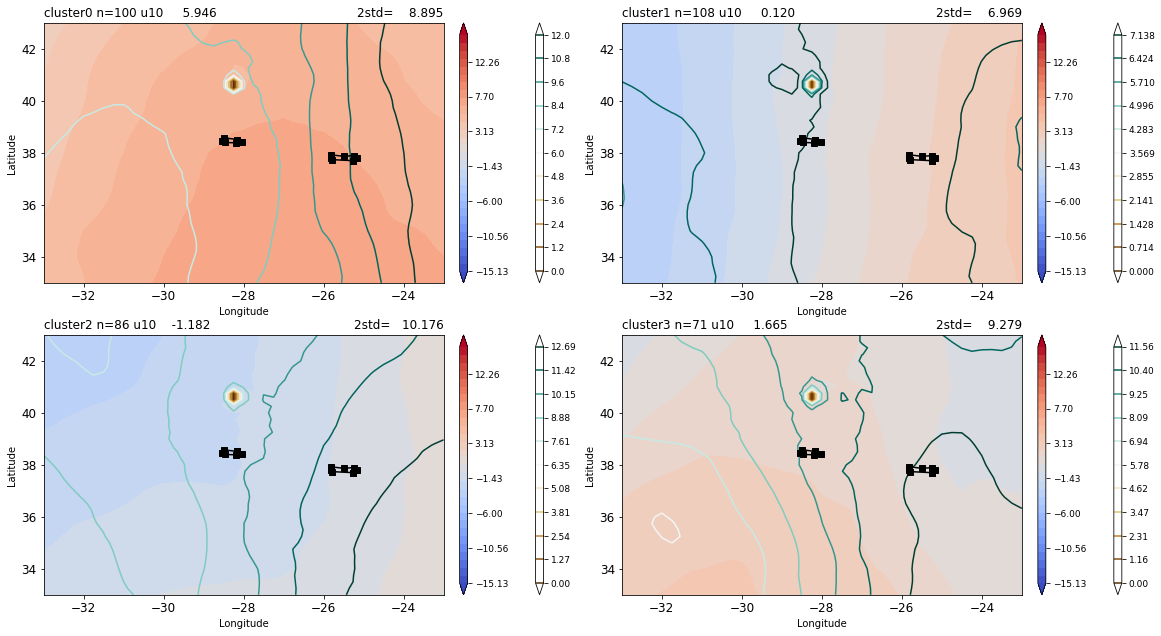

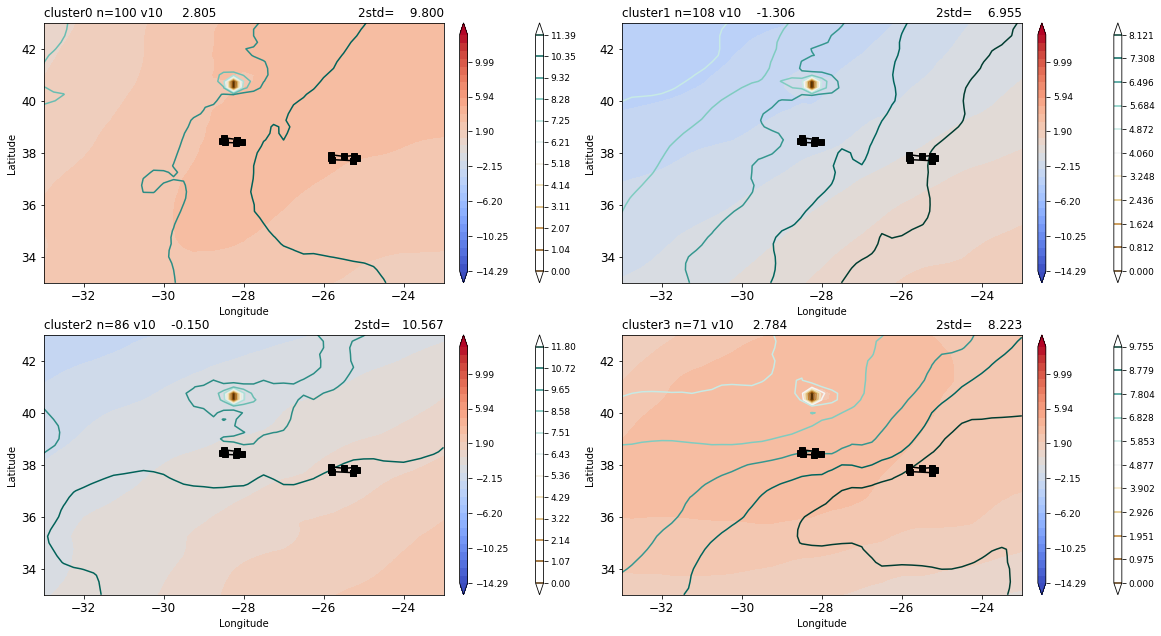

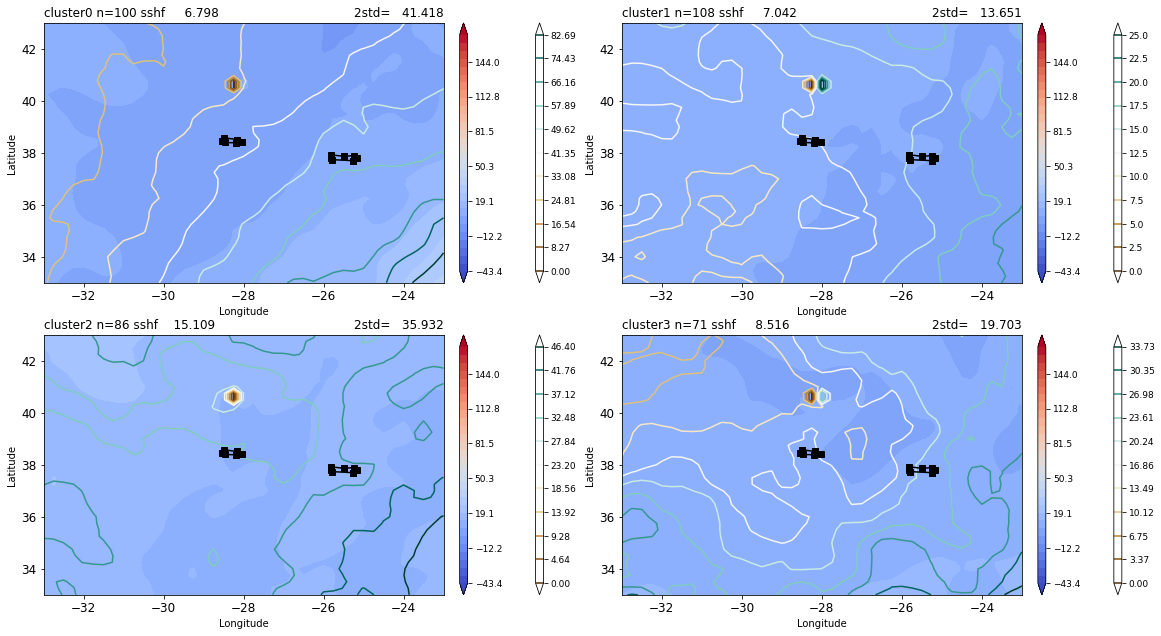

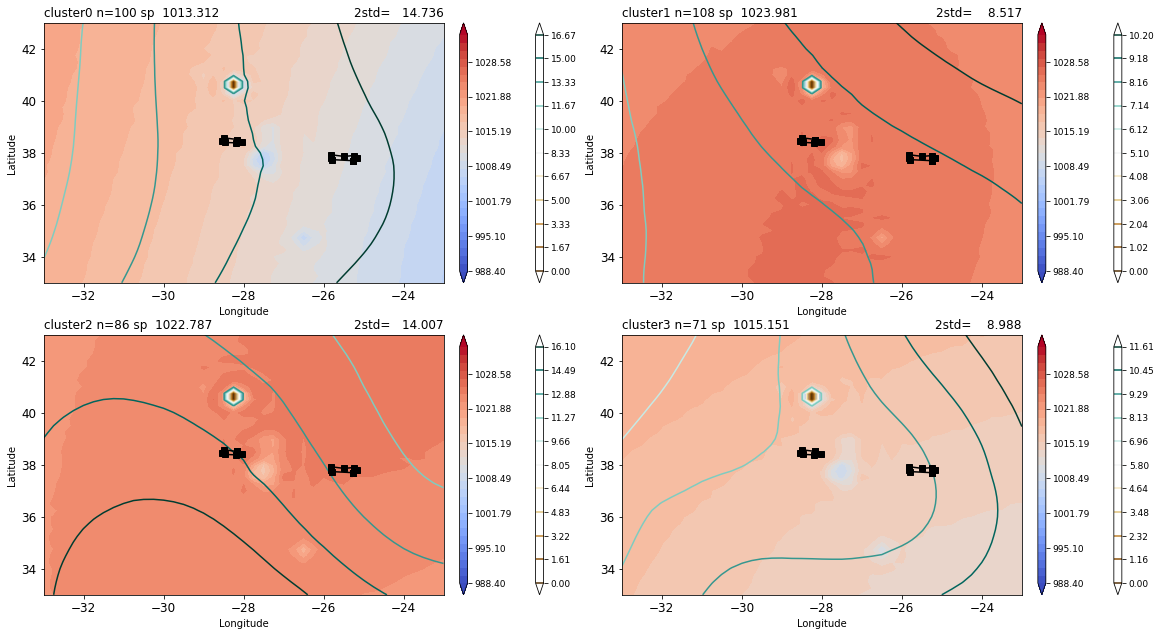

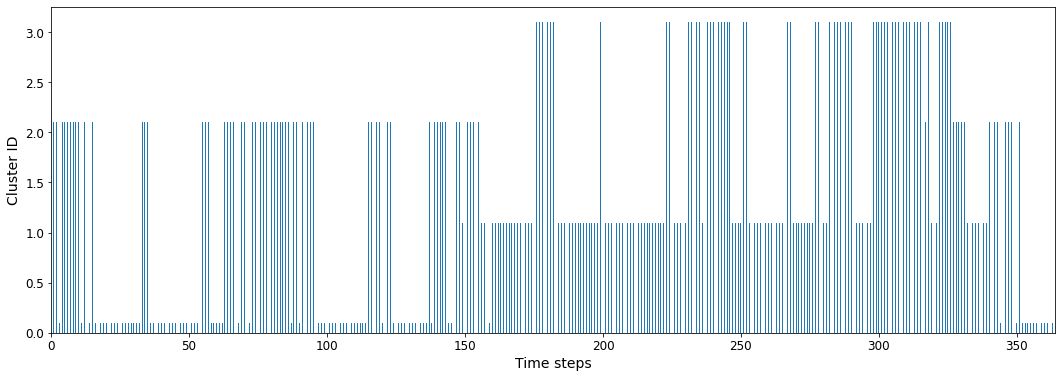

In [65]:
visualization(ncpath,cluster_file,coast_file)

#SST_ONLY

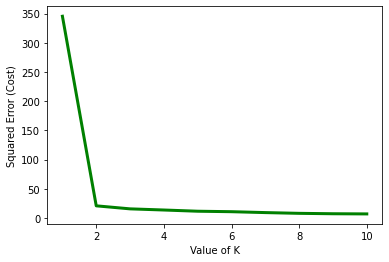

In [57]:
optimalk(data6)

In [60]:
frame4,label4= kmedoids(2,data6)
silhouette_score(data6, label4, metric='cosine')

Estimated number of clusters: 2
0    191
1    174
Name: Cluster, dtype: int64


0.9376404176032658

In [ ]:
print("RMSE | Normalized with SST only")
final2 = RMSE(data6, label4,frame4,True)
final2

RMSE | Normalized with SST only


,0,1
0,16.41,74.07
1,74.07,17.72


In [74]:
make_Csv_cluster(label4,'KMDIODS_SST.csv')

In [79]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
cluster_file='KMDIODS_SST.csv'
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'
varids= ['sst']

total clusters:  2
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariate-weather-data-clustering-main/MWDC/Visualization/Visualization.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0,levels=np.arange(var_range[0],var_range[1],(var_range[1]-var_range[0])/11),extend = 'both',linewidth=0.6)


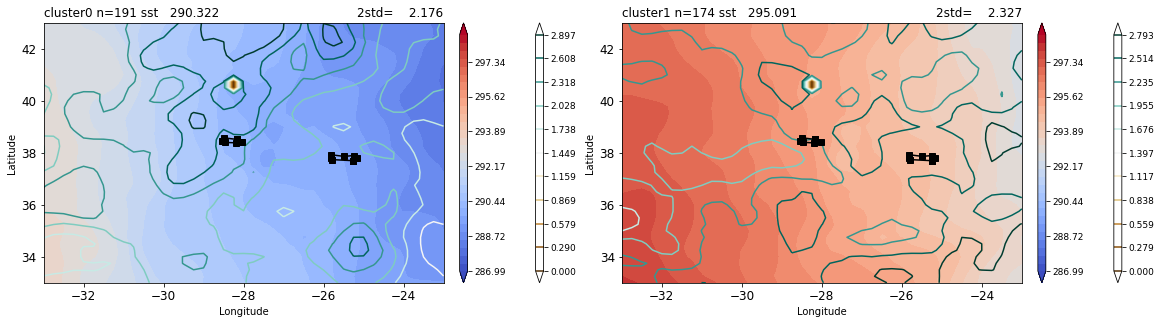

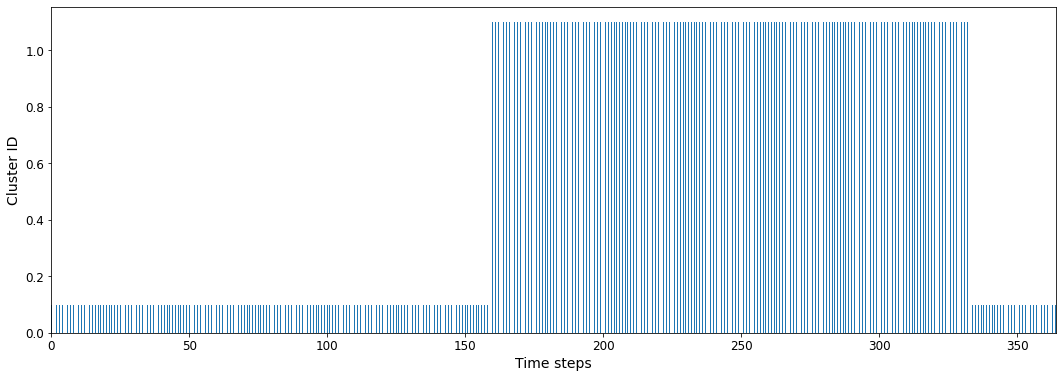

In [80]:
visualization(ncpath,cluster_file,coast_file,varids)

#PCA Only SST

In [77]:
frame4,label4= kmedoids(2,pca1(data6,2))
silhouette_score(data6, label4, metric='cosine')

Estimated number of clusters: 2
0    191
1    174
Name: Cluster, dtype: int64


0.9376404176032658

In [ ]:
print("RMSE | Normalized with PCA SST only")
final2 = RMSE(pca1(data6,2), label4,frame4,True)
final2

RMSE | Normalized with PCA SST only


,0,1
0,16.41,74.07
1,74.07,17.72


In [78]:
make_Csv_cluster(label4,'KMDIODS_PCA_SST.csv')

In [81]:
ncpath='/content/drive/MyDrive/Multivariate Data Independent Study/New_ERA5_meteo_sfc_2021_daily.nc'
cluster_file='KMDIODS_PCA_SST.csv'
coast_file='/content/multivariate-weather-data-clustering-main/MWDC/Visualization/coast.txt'
varids= ['sst']

total clusters:  2
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


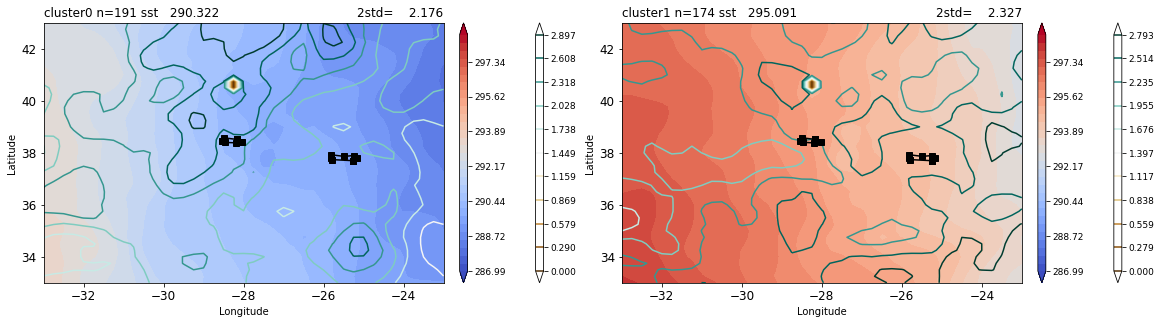

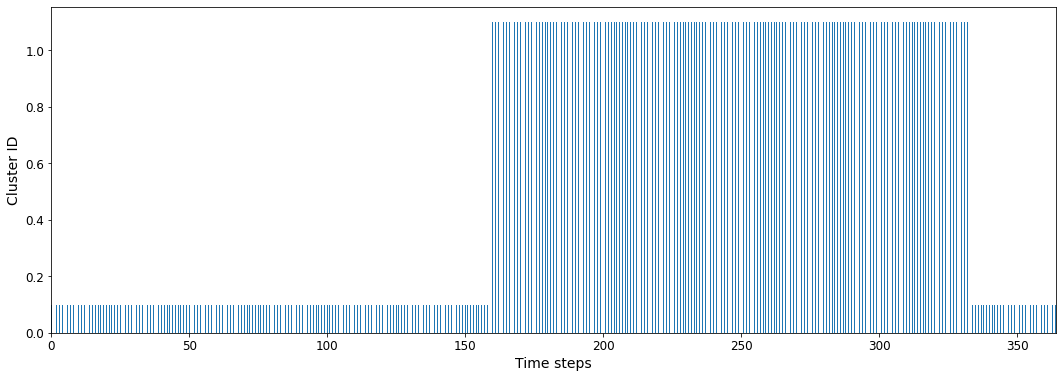

In [82]:
visualization(ncpath,cluster_file,coast_file,varids)